## EDA

In [1]:
#Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

## Food and agriculture data
FAOSTAT provides free access to food and agriculture data for over 245 countries and territories and covers all FAO regional groupings
from 1961 to the most recent year available.

In [2]:
# Read csv file into a pandas dataframe
df_ireland = pd.read_csv('data_ireland.csv')
df_ukraine = pd.read_csv('data_ukraine.csv')
df_poland = pd.read_csv('data_poland.csv')
df_canada = pd.read_csv('data_canada.csv')
df_usa = pd.read_csv('data_usa.csv')
df_switzerland = pd.read_csv('data_switzerland.csv')
df_china = pd.read_csv('data_china.csv')

# looking at the first dataset

In [3]:
# Prints out the first 5 rows

df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [4]:
df_ireland.shape

(9751, 14)

### Missing value

In [5]:
df_ireland.describe()

# We can see that we having varying counts for each of the features within the dataframe. 
# This provides an initial indication that not all values are present.

,Area Code (M49),Element Code,Year Code,Year,Value
count,9751.0,9751.000000,9751.000000,9751.000000,9.181000e+03
mean,372.0,5408.586504,1993.433084,1993.433084,3.510675e+05
std,0.0,113.566945,16.941856,16.941856,9.747935e+05
min,372.0,5111.000000,1961.000000,1961.000000,0.000000e+00
25%,372.0,5312.000000,1980.000000,1980.000000,9.910000e+02
50%,372.0,5419.000000,1995.000000,1995.000000,1.393700e+04
75%,372.0,5510.000000,2008.000000,2008.000000,1.000000e+05
max,372.0,5513.000000,2020.000000,2020.000000,8.561470e+06


In [6]:
# We can take this one step further and use the .info() method. 
# This will return back a summary of the dataframe as well as a count of the non-null values.
# We see missing values in a column "Value"

df_ireland.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9751 non-null   object 
 1   Domain            9751 non-null   object 
 2   Area Code (M49)   9751 non-null   int64  
 3   Area              9751 non-null   object 
 4   Element Code      9751 non-null   int64  
 5   Element           9751 non-null   object 
 6   Item Code (CPC)   9751 non-null   object 
 7   Item              9751 non-null   object 
 8   Year Code         9751 non-null   int64  
 9   Year              9751 non-null   int64  
 10  Unit              9751 non-null   object 
 11  Value             9181 non-null   float64
 12  Flag              9751 non-null   object 
 13  Flag Description  9751 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


In [7]:
# This returns a summary of how many missing values are contained within the dataframe. 
# The isna() part detects missing values within the dataframe and returns a Boolean value for each element in the dataframe. 
# The sum() part sums up the number of True values.



df_ireland.isna().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               570
Flag                  0
Flag Description      0
dtype: int64

From this summary, we can see that column namely "Value" has missing values.

## Using missingno to Identify Missing Data

Within the missingno library, there are four types of plots for visualising data completeness: 
the barplot, the matrix plot, the heatmap, and the dendrogram plot. 
Each has its own advantages for identifying missing data.

Consider some of them in turn.

### Barplot

<AxesSubplot:>

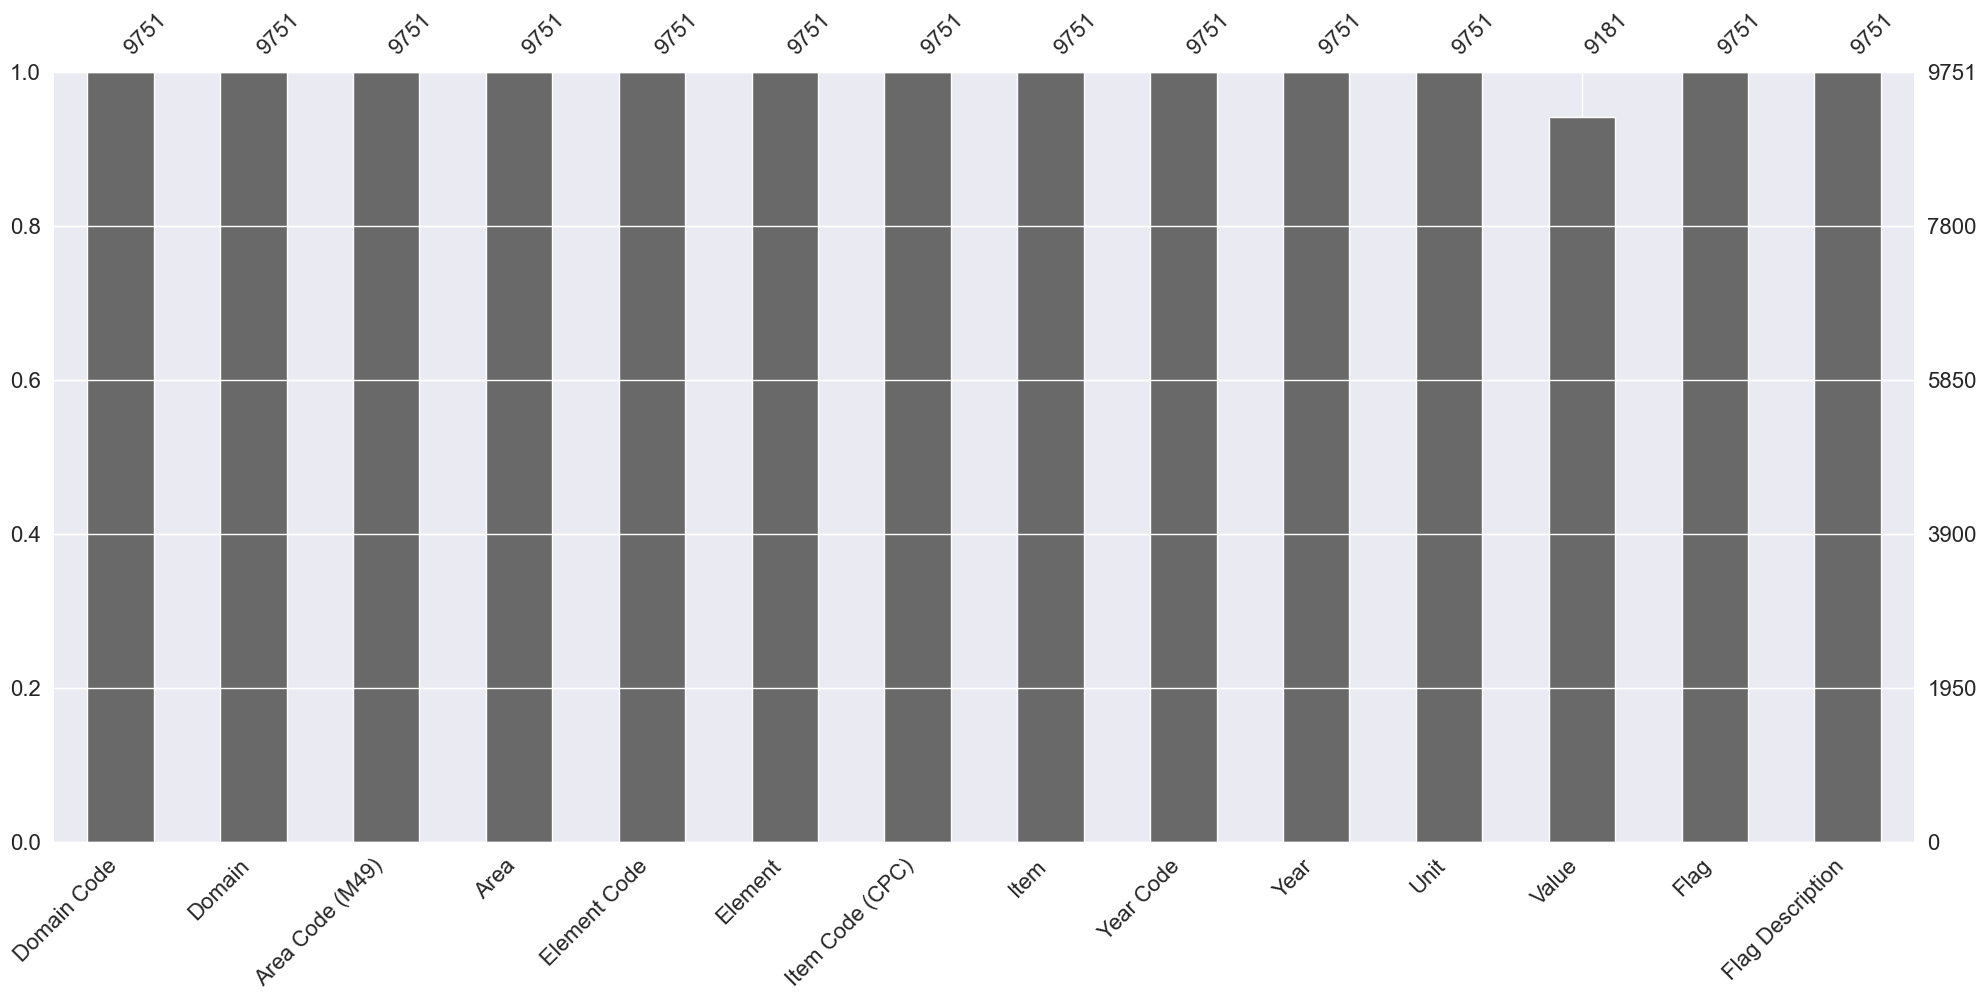

In [8]:
msno.bar(df_ireland)
# In this example we see that the column "Value" has a missing values. 
# The remaining columns are full and have a maximum number of values.

###  Matrix Plot
The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

<AxesSubplot:>

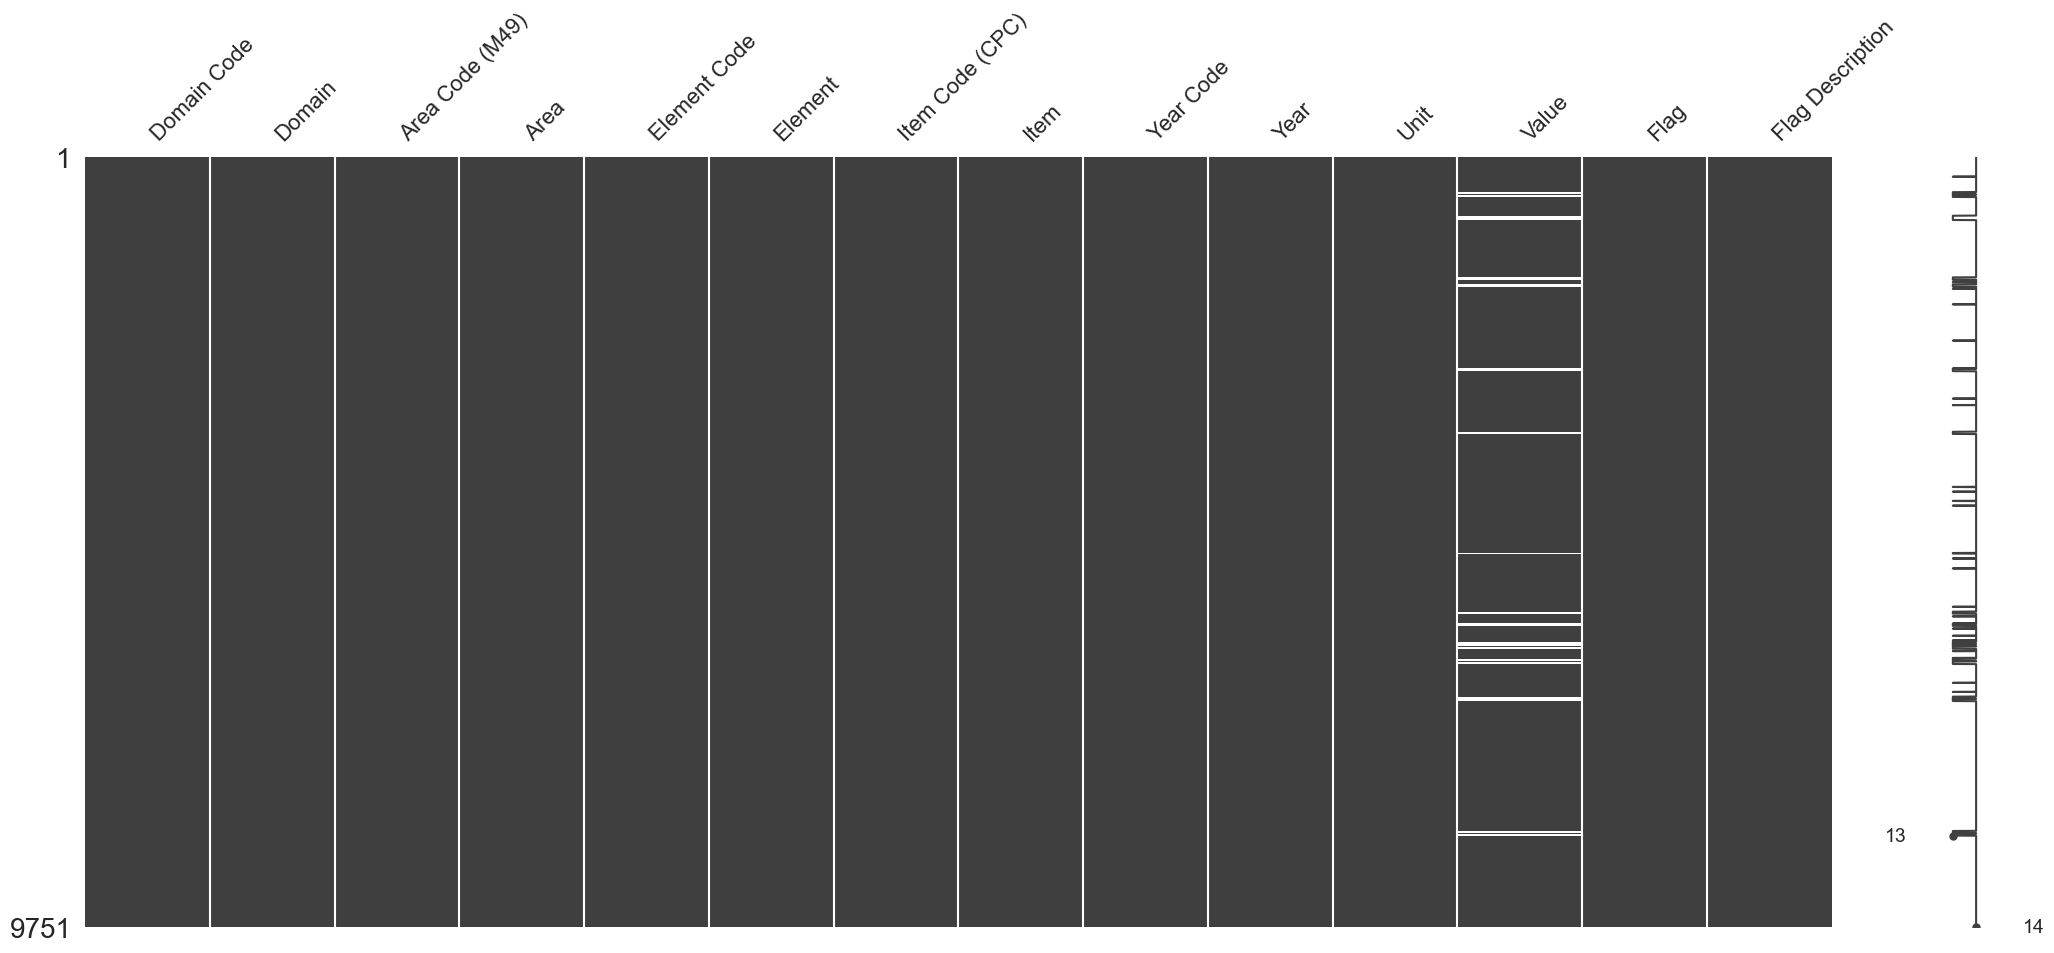

In [9]:
msno.matrix(df_ireland) 

### Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

<AxesSubplot:>

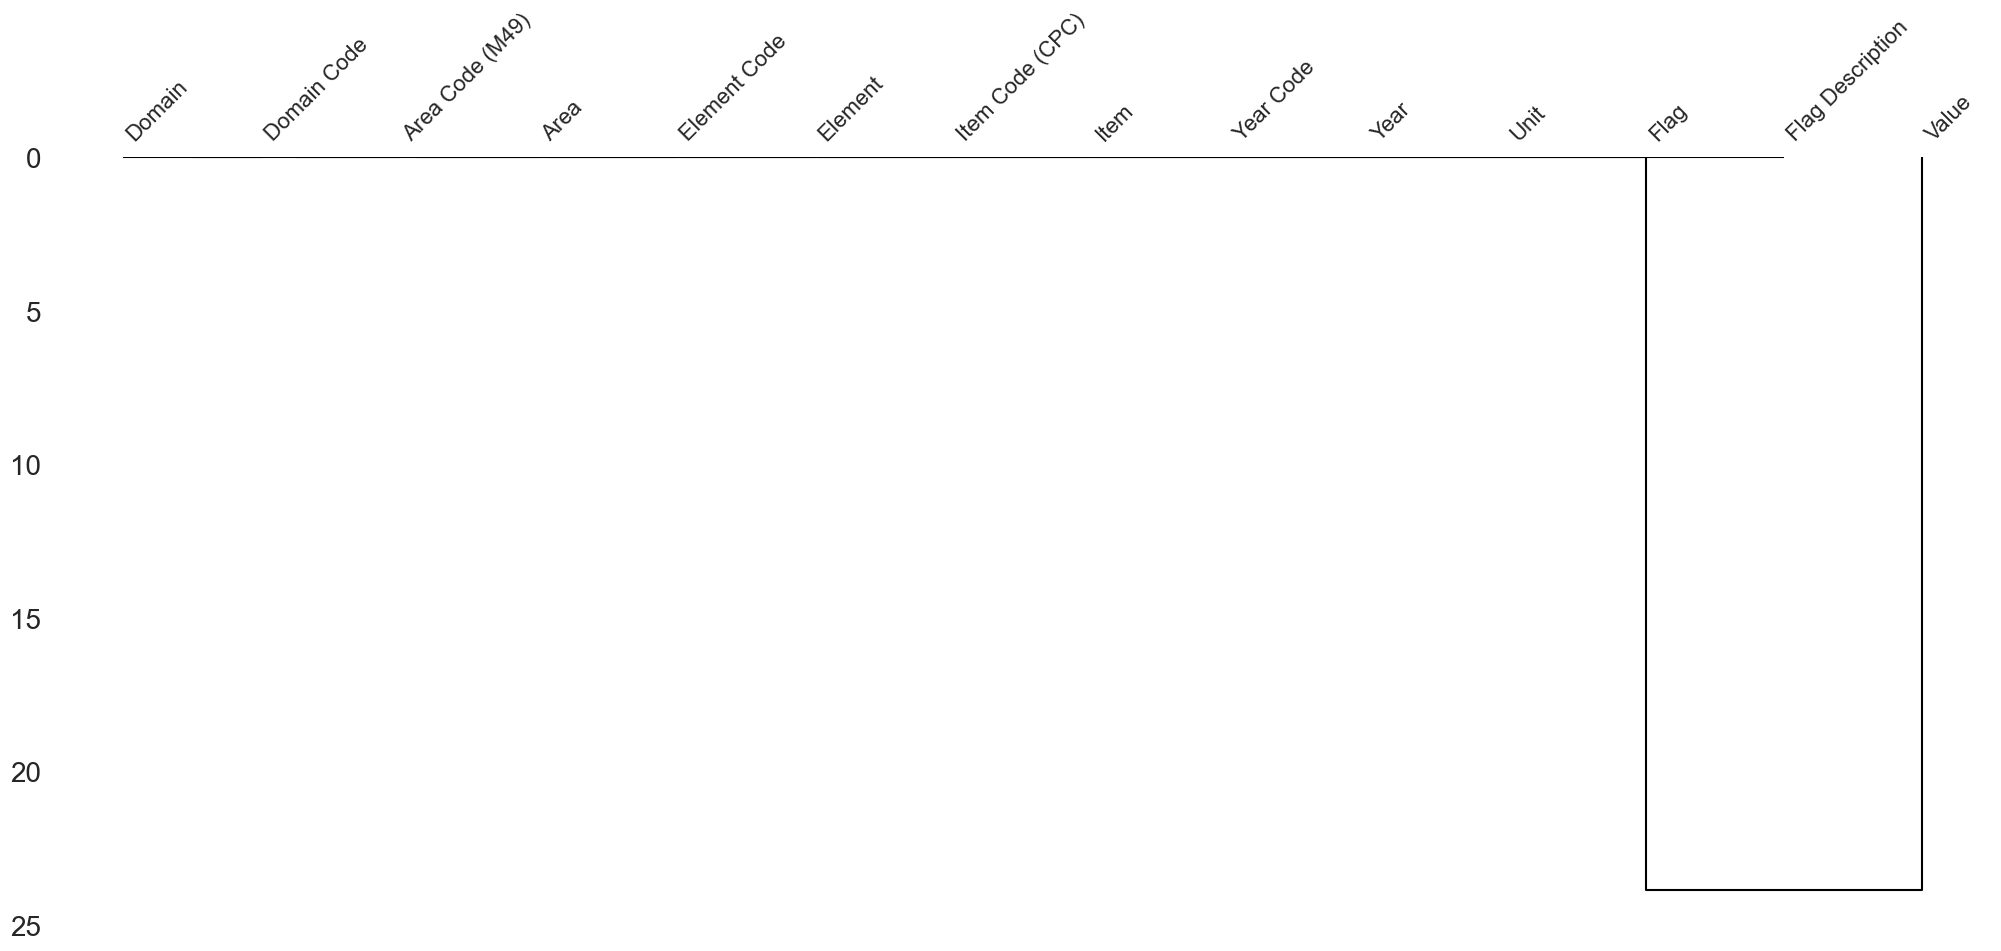

In [10]:
msno.dendrogram(df_ireland)

# All columns except 'Flag' and 'Value' are all grouped together at zero indicating that they are complete.


In [11]:
df_ireland['Flag'].value_counts()

A    4120
E    3157
I    1520
T     484
M     470
Name: Flag, dtype: int64

In [12]:
df_ireland['Flag Description'].value_counts()

Official figure                                      4120
Estimated value                                      3157
Imputed value                                        1520
Unofficial figure                                     484
Missing value (data cannot exist, not applicable)     470
Name: Flag Description, dtype: int64

In [13]:
# To remove missing rows, we can call upon the following

df_ireland_drop = df_ireland.dropna()

#df_ireland_drop.to_csv('df_ireland_drop.csv')


In [14]:
df_ireland = df_ireland_drop

In [15]:
# After deleting missing values, the Missing value column and some values from the Official figure were deleted

df_ireland['Item'].value_counts()

Hen eggs in shell, fresh                           225
Onions and shallots, dry (excluding dehydrated)    180
Cabbages                                           180
Potatoes                                           180
Meat of cattle with the bone, fresh or chilled     180
                                                  ... 
Edible offal of goat, fresh, chilled or frozen       3
Linseed                                              2
Eggplants (aubergines)                               2
Cotton seed                                          2
Unmanufactured tobacco                               2
Name: Item, Length: 138, dtype: int64

In [16]:
# convert float64 in "Value" col to int.
df_ireland['Value'] = df_ireland['Value'].astype(int)  

In [17]:
# Rows containing duplicate data 
duplicate_rows_df_ireland = df_ireland[df_ireland.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ireland.shape)

number of duplicate rows: (0, 14)


In [18]:
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0,A,Official figure


## Dashboard


In [19]:
import ipywidgets as widgets
style = {'description_width': 'initial'}
limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=5000,
    step=1,
    description='Max Number of Case:',
    disabled=False,
    style=style)

In [20]:
def update_df_length(limit):
    
    df = df_ireland
    df = df.iloc[0:limit, :]
    
    print("Number of rows in the dataset that have been successfully loaded:"+str(len(df)))

In [21]:
widgets.interactive(update_df_length, limit=limit_case)

interactive(children=(IntSlider(value=1000, description='Max Number of Case:', max=5000, min=100, style=Slider…

In [22]:
from ipywidgets import Layout

unique_item = df_ireland.Item.unique()

items = widgets.SelectMultiple(
    options = unique_item.tolist(),
    value = ['Apples', 'Cauliflowers and broccoli'],
    description='District',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

In [23]:
items

SelectMultiple(description='District', index=(1, 18), layout=Layout(display='flex', height='80px', width='50%'…

In [24]:
unique_year = df_ireland.Year.unique()

style = {'description_width': 'initial'}

years = widgets.SelectMultiple(
    options = unique_year.tolist(),
    value = [2018, 2020],
    description='Criminal Case',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)

In [25]:
years

SelectMultiple(description='Criminal Case', index=(0, 2), layout=Layout(height='80px', width='50%'), options=(…

# Apple

In [26]:
df = df_ireland.query("Item=='Apples'")
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
6,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1961,1961,ha,3000,E,Estimated value
7,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1962,1962,ha,3000,E,Estimated value
8,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1963,1963,ha,3000,E,Estimated value
9,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1964,1964,ha,2000,E,Estimated value
10,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1965,1965,ha,1500,E,Estimated value


In [27]:
df_ireland.describe()


,Area Code (M49),Element Code,Year Code,Year,Value
count,9181.0,9181.000000,9181.000000,9181.000000,9.181000e+03
mean,372.0,5410.663871,1993.328831,1993.328831,3.510675e+05
std,0.0,112.983686,16.925694,16.925694,9.747935e+05
min,372.0,5111.000000,1961.000000,1961.000000,0.000000e+00
25%,372.0,5320.000000,1980.000000,1980.000000,9.910000e+02
50%,372.0,5419.000000,1995.000000,1995.000000,1.393700e+04
75%,372.0,5510.000000,2008.000000,2008.000000,1.000000e+05
max,372.0,5513.000000,2020.000000,2020.000000,8.561470e+06


In [28]:
df_ireland.tail(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
9741,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2008,2008,tonnes,0,I,Imputed value
9742,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2009,2009,tonnes,0,I,Imputed value
9743,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2010,2010,tonnes,0,I,Imputed value
9744,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2011,2011,tonnes,0,I,Imputed value
9745,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2012,2012,tonnes,0,I,Imputed value
9746,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2013,2013,tonnes,0,I,Imputed value
9747,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2014,2014,tonnes,0,I,Imputed value
9748,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2015,2015,tonnes,0,E,Estimated value
9749,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2016,2016,tonnes,0,E,Estimated value
9750,QCL,Crops and livestock products,372,Ireland,5510,Production,22221.01,"Whole milk, evaporated",2017,2017,tonnes,0,E,Estimated value


## Anomaly Detection  - выбросы

### Building the Isolation Forest Model with Scikit-Learn
From our data frame, we need to select the variables with which we will train our isolated forest model.

In this example, I will only use two variables ('Year', 'Value'). 
Using two variables allows us to visualize what the algorithm did.

In [29]:
from sklearn.ensemble import IsolationForest


In [30]:
# First, we will create a list of our column names:

anomaly_inputs = ['Year', 'Value']


In [31]:
# Next, we will create an instance of our Isolation Forest model. 
# This is done, first by creating a variable called model_IF and then assigning it to IsolationForest().

# We can then pass in a number of parameters for our model. 

model_IF = IsolationForest(contamination=float(0.2),random_state=42)


In [32]:
model_IF.fit(df_ireland[anomaly_inputs])


IsolationForest(contamination=0.2, random_state=42)

After fitting the model, we can now create some predictions. We will do this by adding two new columns to our dataframe:

anomaly_scores : Generated by calling upon model_IF.decision_function() and provides the anomaly score for each sample within the dataset. 
The lower the score, the more abnormal that sample is. 
Negative values indicate that the sample is an outlier.

anomaly : Generated by calling upon model_IF.predict() and is used to identify if a point is an outlier (-1) or an inlier (1)


In [33]:
df_ireland['anomaly_scores'] = model_IF.decision_function(df_ireland[anomaly_inputs])
df_ireland['anomaly'] = model_IF.predict(df_ireland[anomaly_inputs])


In [34]:
# Once the anomalies have been identified, we can view our dataframe and see the result.
df_ireland.loc[:, ['Year', 'Value','anomaly_scores','anomaly'] ]


,Year,Value,anomaly_scores,anomaly
0,2018,0,0.059903,1
1,2019,0,0.048112,1
2,2020,0,0.029219,1
3,2018,0,0.059903,1
4,2019,0,0.048112,1
...,...,...,...,...
9746,2013,0,0.083969,1
9747,2014,0,0.084255,1
9748,2015,0,0.081909,1
9749,2016,0,0.071388,1


## Visualising Anomaly Data using matplotlib

In [35]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1836
Number of non anomalous values  7345
Total Number of Values: 9181


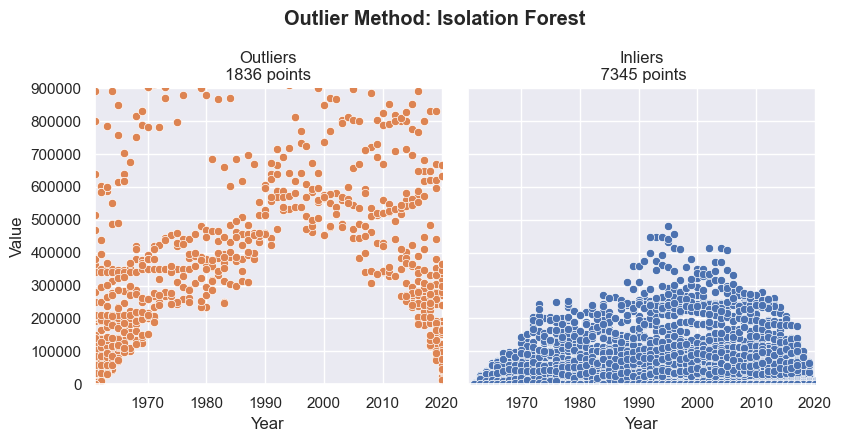

In [36]:
# Right away we can tell how many values have been identified as outliers and where they are located.


outlier_plot(df_ireland, 'Isolation Forest', 'Year', 'Value', [1961, 2020], [0, 900000]);


## Visualising Outliers with Seaborn’s Pairplot

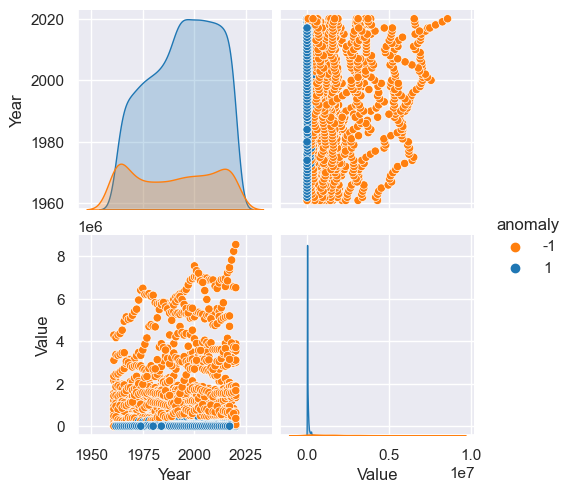

In [37]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_ireland, vars=anomaly_inputs, hue='anomaly', palette=palette)

array([[<AxesSubplot:title={'center':'Area Code (M49)'}>,
        <AxesSubplot:title={'center':'Element Code'}>,
        <AxesSubplot:title={'center':'Year Code'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Value'}>,
        <AxesSubplot:title={'center':'anomaly_scores'}>],
       [<AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

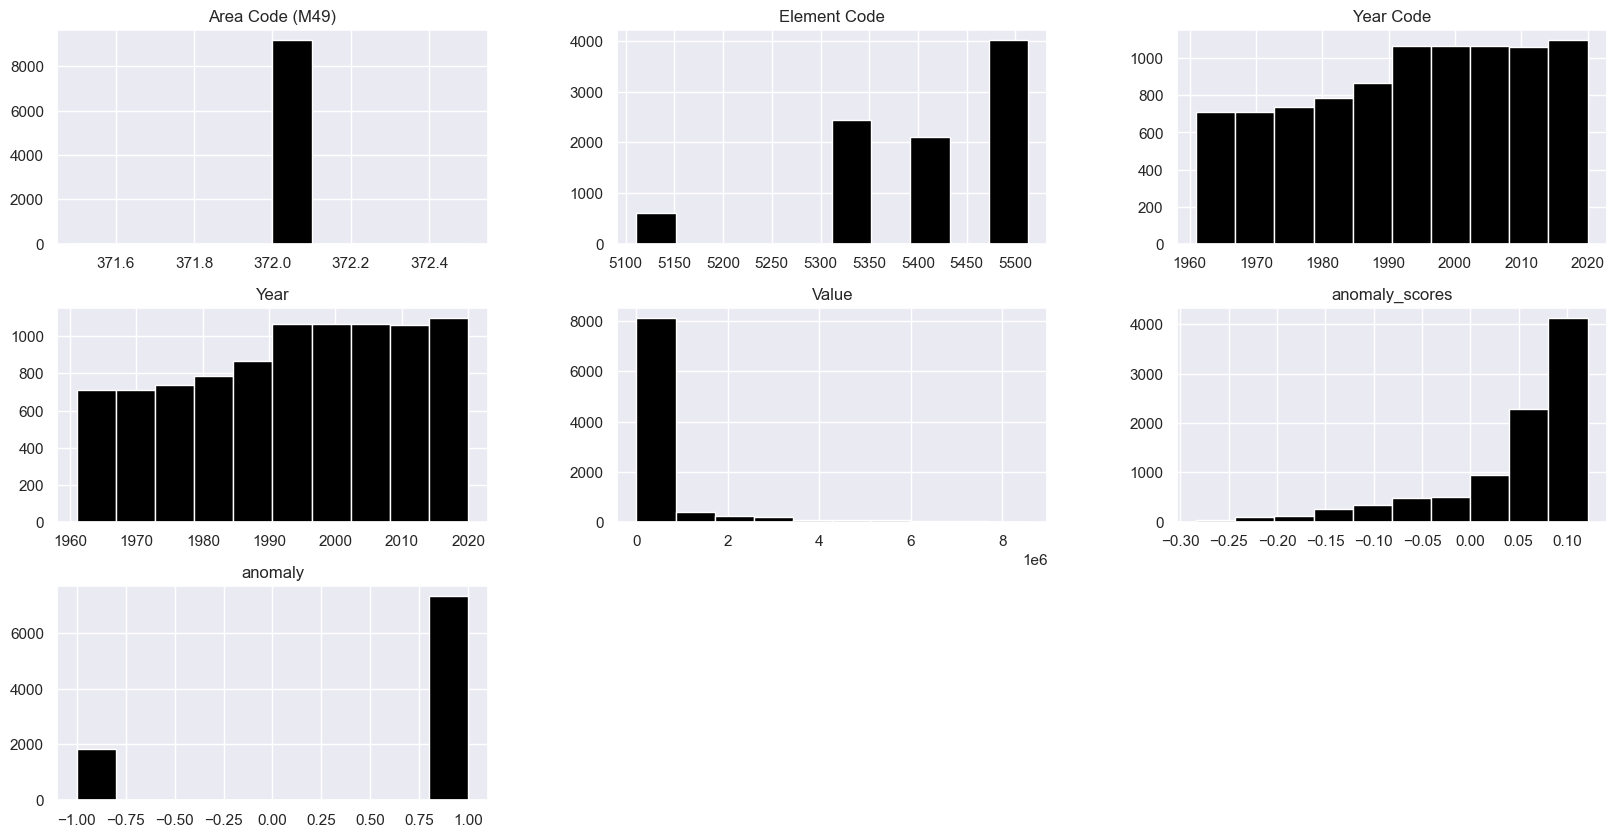

In [38]:
df_ireland.hist(bins = 10, figsize = (20,10), color = 'black')

In [39]:
df_ireland.shape

(9181, 16)

<AxesSubplot:xlabel='Value'>

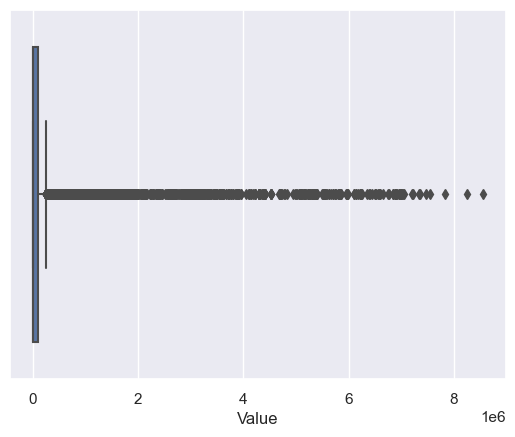

In [40]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

### Inter Quartile Range

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal. According to this procedure, we need to follow the following steps:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
Any data point outside this range is considered as outlier and should be removed for further analysis.
In boxplot, this IQR method is implemented to detect any extreme data point where the maximum point (the end of high whisker) is Q3+1.5*IQR and the minimum point (the start of low whisker) is Q1–1.5*IQR.


### Межквартильный диапазон (IQR) — одна из наиболее широко используемых процедур для обнаружения и удаления выбросов. В соответствии с этой процедурой нам необходимо выполнить следующие шаги:

Найдите первый квартиль, Q1.
Найдите третий квартиль, Q3.
Рассчитать IQR. IQR = Q3-Q1.
Определите нормальный диапазон данных с нижним пределом как Q1–1,5*IQR и верхним пределом как Q3+1,5*IQR.
Любая точка данных за пределами этого диапазона считается выбросом и должна быть удалена для дальнейшего анализа.
На ящичной диаграмме этот метод IQR применяется для обнаружения любой экстремальной точки данных, где точка максимума (конец высоких усов) равна Q3+1,5*IQR, а точка минимума (начало низких усов) равна Q1–1,5*IQR.



Q1 = df_ireland["Value"].quantile(0.25) 
Q3 = df_ireland["Value"].quantile(0.75) 
IQR = Q3 - Q1 
print(IQR)

df_ireland = df_ireland[~((df_ireland["Value"] < (Q1-1.5 * IQR)) |(df_ireland["Value"] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_ireland.shape

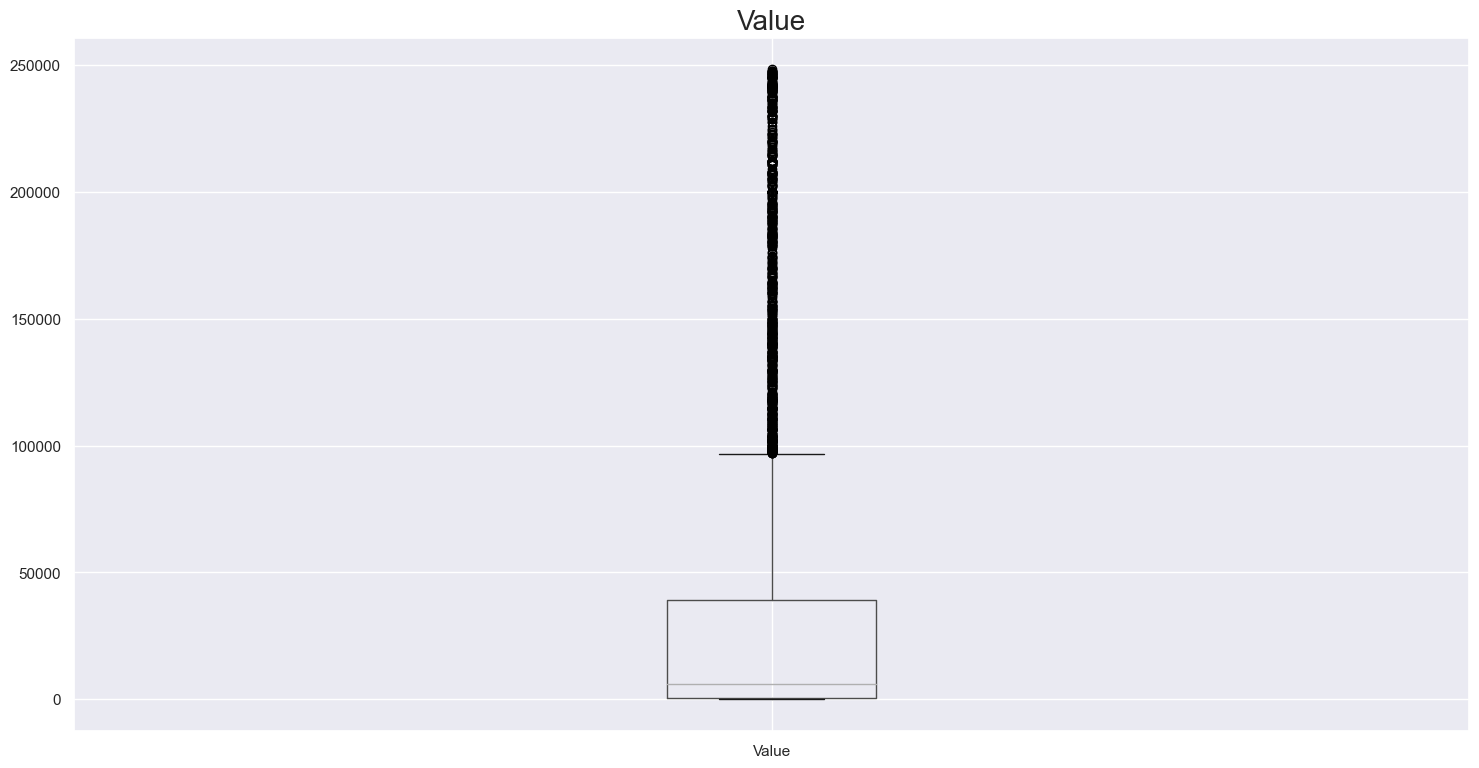

In [41]:
Q1 = df_ireland["Value"].quantile(0.25) 
Q3 = df_ireland["Value"].quantile(0.75) 
IQR = Q3 - Q1 
df_ireland = df_ireland[((df_ireland["Value"] >= (Q1 - 1.5 * IQR)) & (df_ireland["Value"] <= (Q3 +1.5 * IQR)))] 
num_cols = ['Value'] 
plt.figure(figsize=(18,9)) 
df_ireland[num_cols].boxplot() 
plt.title("Value", fontsize=20) 
plt.show()

In [42]:
df_ireland.shape

(7581, 16)

<AxesSubplot:xlabel='Value'>

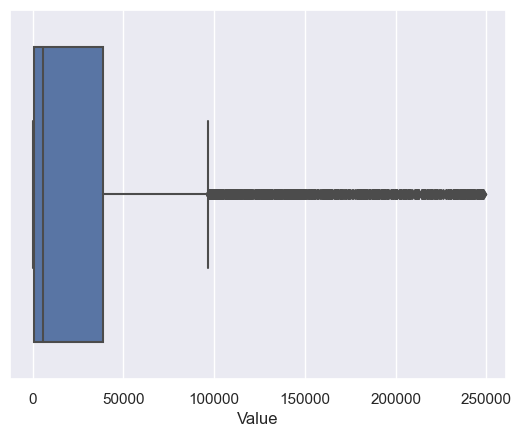

In [43]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

<AxesSubplot:xlabel='Value'>

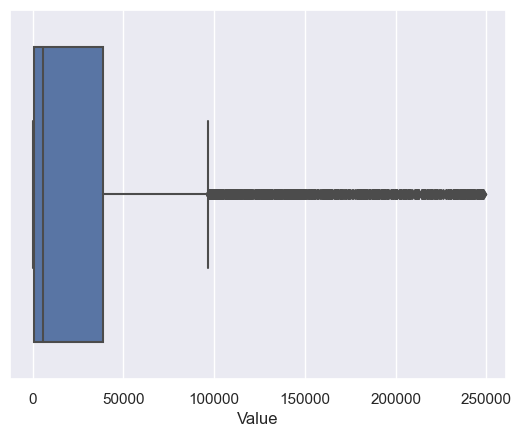

In [44]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

In [45]:
df_ireland.shape

(7581, 16)

In [46]:
df_ireland.describe()


,Area Code (M49),Element Code,Year Code,Year,Value,anomaly_scores,anomaly
count,7581.0,7581.000000,7581.000000,7581.000000,7581.000000,7581.000000,7581.000000
mean,372.0,5417.588181,1993.266456,1993.266456,30462.172141,0.075577,0.907136
std,0.0,109.690842,16.929396,16.929396,51086.824386,0.036856,0.420865
min,372.0,5111.000000,1961.000000,1961.000000,0.000000,-0.094630,-1.000000
25%,372.0,5312.000000,1979.000000,1979.000000,600.000000,0.056206,1.000000
50%,372.0,5420.000000,1995.000000,1995.000000,6000.000000,0.083258,1.000000
75%,372.0,5510.000000,2008.000000,2008.000000,39058.000000,0.104295,1.000000
max,372.0,5510.000000,2020.000000,2020.000000,248366.000000,0.121283,1.000000


##  Outliers based on z-score

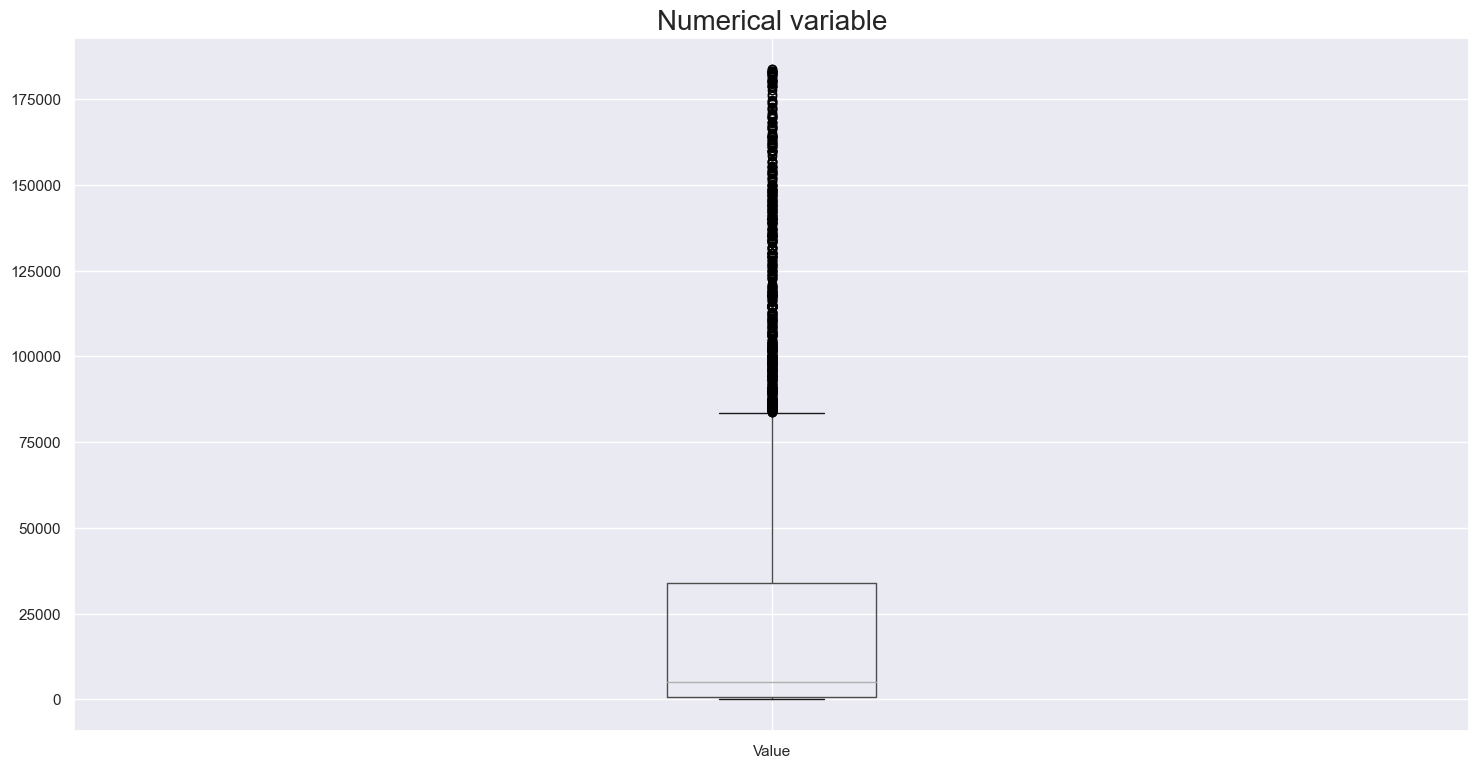

In [47]:
df_zscore = df_ireland["Value"]
z = np.abs(stats.zscore(df_zscore)) 
df_zscore = pd.concat([df_zscore, z], axis=1) 
df_zscore.columns = ['Value', 'z_score'] 
df_zscore = df_zscore[(df_zscore.z_score < 3) & (df_zscore.z_score > -3)] 
num_cols = ['Value'] 
plt.figure(figsize=(18,9)) 
df_zscore[num_cols].boxplot() 
plt.title("Numerical variable", fontsize=20) 
plt.show()

<AxesSubplot:>

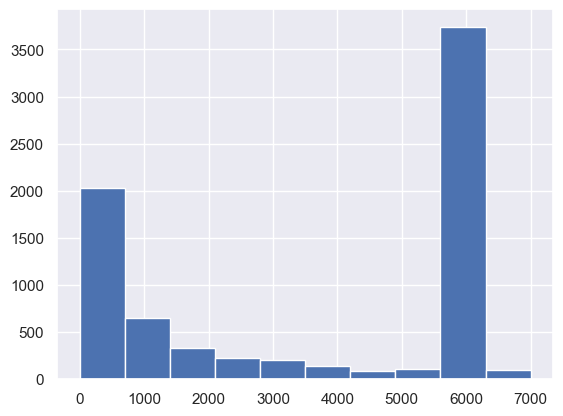

In [48]:
df_ireland.loc[df_ireland["Value"]> 7000, 'Value'] = df_ireland["Value"].median()
df_ireland["Value"].hist()

<AxesSubplot:xlabel='Value'>

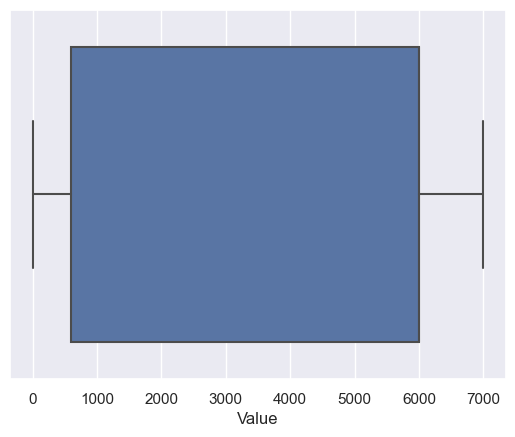

In [49]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

# IRELAND: DAIRY SECTOR

https://data.cso.ie/table/AAA10


Cattle results have been obtained from the Department of Agriculture, Food and Marine (DAFM) AIM system. The bull data was revised from June 2010 to June 2019 in September 2020. These revisions also resulted in changes to the cattle 1-2 years, male cattle 1-2 years, cattle 2 years and over and the male cattle 2 years and over categories. Dairy cows are those kept principally to produce milk for human consumption. Bulls used for breeding purposes only. The regional composition is based on the new NUTS ((Nomenclature of Territorial Units) classification which came into effect on 1st January 2018 following an Amendment of the EU NUTS legislation. Updated 29.09.2020 with corrected figures for Waterford and Wexford.



Результаты по крупному рогатому скоту были получены из системы AIM Министерства сельского хозяйства, продовольствия и морепродуктов (DAFM). Данные по быкам были пересмотрены с июня 2010 г. по июнь 2019 г. в сентябре 2020 г. Эти изменения также привели к изменениям в категориях крупного рогатого скота 1–2 лет, самцов крупного рогатого скота 1–2 лет, крупного рогатого скота 2 лет и старше и самцов крупного рогатого скота 2 лет и старше. . Молочные коровы - это те, которые содержатся в основном для производства молока для потребления человеком. Быки используются только для разведения. Региональный состав основан на новой классификации NUTS ((Номенклатура территориальных единиц), которая вступила в силу 1 января 2018 г. после внесения поправок в законодательство ЕС по NUTS. Обновлено 29 сентября 2020 г. с исправленными данными для Уотерфорда и Уэксфорда.



In [50]:
df_cattle = pd.read_csv('Number_of_Cattle.csv')
df_cattle.head()


,STATISTIC Label,Year,Type of Cattle,Region and County,UNIT,VALUE
0,Number of Cattle in June,2015,Total cattle,State,000 Head,6963.5
1,Number of Cattle in June,2015,Total cattle,Northern and Western,000 Head,1723.9
2,Number of Cattle in June,2015,Total cattle,Border,000 Head,793.6
3,Number of Cattle in June,2015,Total cattle,Leitrim,000 Head,65.0
4,Number of Cattle in June,2015,Total cattle,Sligo,000 Head,113.5


In [51]:
df = df_cattle[["Year", "Type of Cattle","Region and County", "VALUE"]].dropna()
df.head()

,Year,Type of Cattle,Region and County,VALUE
0,2015,Total cattle,State,6963.5
1,2015,Total cattle,Northern and Western,1723.9
2,2015,Total cattle,Border,793.6
3,2015,Total cattle,Leitrim,65.0
4,2015,Total cattle,Sligo,113.5


In [52]:
df = df.rename(columns ={"Type of Cattle":"Type","Region and County":"County"})
df.head(5)

,Year,Type,County,VALUE
0,2015,Total cattle,State,6963.5
1,2015,Total cattle,Northern and Western,1723.9
2,2015,Total cattle,Border,793.6
3,2015,Total cattle,Leitrim,65.0
4,2015,Total cattle,Sligo,113.5


In [53]:
df1 = df.query("Type=='Dairy cows'")
df1.head(20)

,Year,Type,County,VALUE
74,2015,Dairy cows,State,1295.8
75,2015,Dairy cows,Northern and Western,155.0
76,2015,Dairy cows,Border,99.2
77,2015,Dairy cows,Leitrim,2.1
78,2015,Dairy cows,Sligo,8.1
79,2015,Dairy cows,Cavan,35.8
80,2015,Dairy cows,Donegal,18.9
81,2015,Dairy cows,Monaghan,34.4
82,2015,Dairy cows,West,55.8
83,2015,Dairy cows,Galway,31.2


In [54]:
df1['County'].value_counts()

State                   7
Kilkenny                7
Waterford               7
South-West              7
Cork                    7
Kerry                   7
Eastern and Midland     7
Dublin                  7
Dublin and Mid-East     7
Kildare                 7
Louth                   7
Meath                   7
Wicklow                 7
Midland                 7
Laois                   7
Longford                7
Offaly                  7
Wexford                 7
Carlow                  7
Northern and Western    7
South-East              7
Border                  7
Leitrim                 7
Sligo                   7
Cavan                   7
Donegal                 7
Monaghan                7
West                    7
Galway                  7
Mayo                    7
Roscommon               7
Southern                7
Mid-West                7
Clare                   7
Limerick                7
Tipperary               7
Westmeath               7
Name: County, dtype: int64

In [55]:
import geopandas as gpd
ROI_map= gpd.read_file('IRL_adm1.shp')  #reading the map 
ROI_map.NAME_1 #you can see names of counties here

AttributeError: 'GeoDataFrame' object has no attribute 'NAME_1'

In [ ]:
ROI_map.head()

In [ ]:
outer_merge=pd.merge(df1, ROI_map, how="outer")

In [ ]:
df_cattle.info()

In [ ]:
df_cattle['Year'].value_counts()

In [ ]:
df_cattle['Type of Cattle'].value_counts()

Поголовье крупного рогатого скота                                         
Коровы                                                             
Молочные коровы                                                 
Другие коровы                                               
Быки                                                           
КРС: 2 года и старше                     
Самец: 2 года и старше      
Самка: 2 года и старше   
КРС: 1-2 года                                   
Поголовье крупного рогатого скота: 1-2 года                         
Самка крупного рогатого скота: 1-2 года                     
КРС: до 1 года                             
Самец скота: до 1 ...

In [ ]:
df_cattle['Region and County'].value_counts()

In [ ]:
df_cattle['VALUE'].value_counts()

Building the Isolation Forest Model with Scikit-Learn
From our dataframe, we need to select the variables we will train our Isolation Forest model with.

In this example, I am going to use just two variables (NPHI and RHOB). In reality, we would use more and we will see an example of that later on. Using two variables allows us to visualise what the algorithm has done.

First, we will create a list of our column names: